# Baseline model

Initial data saved from EDA will be run as is to select baseline model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
#Read processed file
full_path='../data/processed/mean_impute_all_features.csv'
dataframe = pd.read_csv(full_path)
dataframe.reset_index(drop=True, inplace=True)
X, y= dataframe.drop('gestational dm', axis=1), dataframe['gestational dm'] 
#Splitting X,y into Train & Test
seed=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
dataframe.head()

,age (years),ethnicity,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational dm
0,20,0.0,73.5,125.0,28.1,12.1,1.0,81.2,33.20,0
1,28,0.0,75.5,112.0,43.1,11.5,1.0,76.0,21.50,0
2,21,1.0,70.5,116.0,41.4,12.6,1.0,86.0,21.41,0
3,25,0.0,92.5,167.0,39.6,16.2,4.0,81.2,55.36,0
4,33,1.0,79.0,137.0,67.8,11.2,2.0,86.0,30.85,1


In [4]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))

In [5]:
#Test accuracy and score
random_state=10
names = []
scores = []
y_pred_list=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/Users/harmeetkaur/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.851852
1  SVC  0.851852
2   LR  0.851852
3   DT  0.703704
4  GNB  0.888889
5   RF  0.888889
6   GB  0.888889


## Check confusion matrix, Recall, Precision and F-1 score for the best models
Compare scores of Random forest, Gaussian Naive Bayes and Gradient Boosting

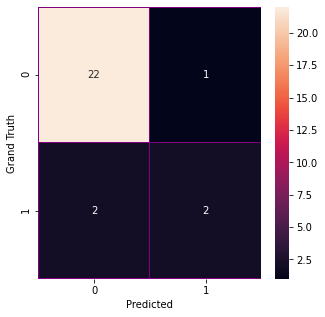

,Precision,Recall,F1 Score
Results,0.666667,0.5,0.571429


In [50]:
rf=RandomForestClassifier(random_state=seed).fit(X_train, y_train)
y_pred=rf.predict(X_test)
conf_matrix(y_test, y_pred)

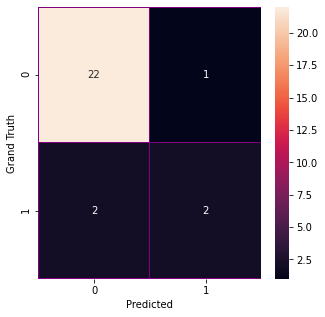

,Precision,Recall,F1 Score
Results,0.666667,0.5,0.571429


In [51]:
gb=GradientBoostingClassifier(random_state=seed).fit(X_train, y_train)
y_pred=gb.predict(X_test)
conf_matrix(y_test, y_pred)

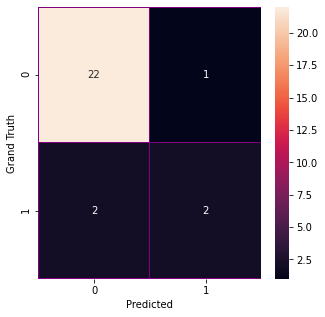

,Precision,Recall,F1 Score
Results,0.666667,0.5,0.571429


In [52]:
gnb=GaussianNB().fit(X_train, y_train)
y_pred=gnb.predict(X_test)
conf_matrix(y_test, y_pred)

The performance of the 3 models seem equal, so anyone can be chosen as the baseline model. I will proceed with Random Forest